In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [4]:
df.Name.nunique()

891

In [7]:
df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [22]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
df.Survived.mode()

0    0
dtype: int64

In [9]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
df.Pclass.median()

3.0

In [17]:
df.Age.quantile(0.1)

14.0

In [18]:
df.Age.mean()

29.69911764705882

In [23]:
df['Survived'] = df.Survived.astype(str)

In [24]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Survived,891,2,0,549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,891,"Kallio, Mr. Nikolai Erland",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [27]:
type(df.Age)

pandas.core.series.Series

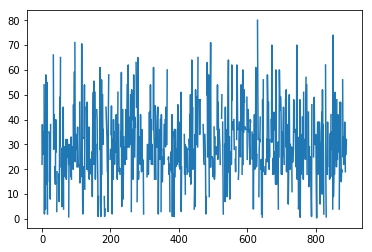

In [31]:
plt.plot(df.Age)

In [7]:
import seaborn as sns

In [33]:
sns.set()

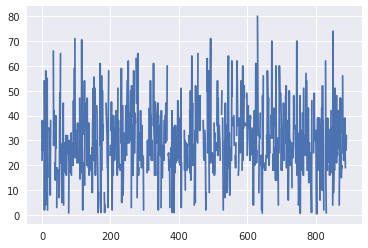

In [34]:
plt.plot(df.Age)

In [35]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

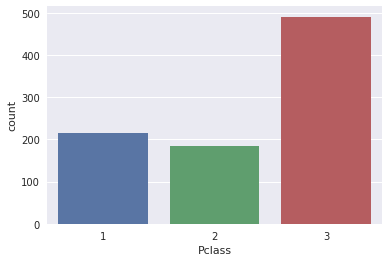

In [42]:
sns.countplot(x='Pclass', data=df);

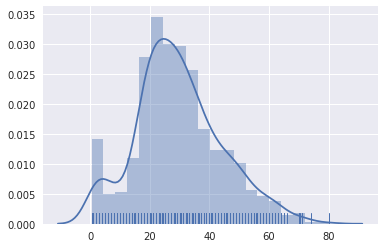

In [54]:
sns.distplot([x for x in df.Age if x==x], rug=True);

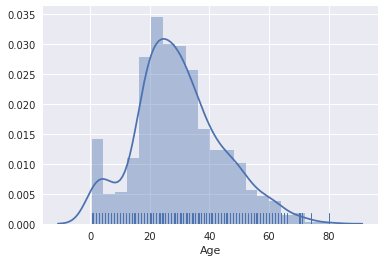

In [55]:
sns.distplot(df.Age.dropna(), rug=True);

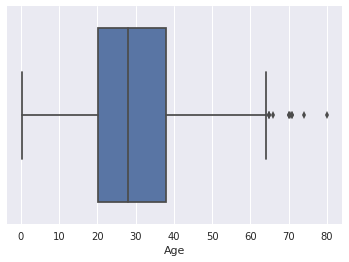

In [57]:
sns.boxplot(x='Age', data=df);

In [58]:
pd.crosstab(df.Survived, df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [62]:
pd.crosstab(df.Survived, df.Sex, df.Age, aggfunc=np.mean)

Sex,female,male
Survived,,
0,25.046875,31.618056
1,28.847716,27.276022


In [65]:
df.groupby('Sex').Age.mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

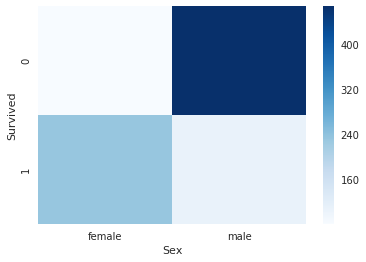

In [70]:
sns.heatmap(pd.crosstab(df.Survived, df.Sex), cmap='Blues');

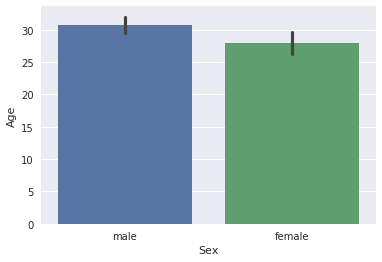

In [72]:
sns.barplot(x='Sex', y='Age', data=df);

/opt/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/opt/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/opt/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


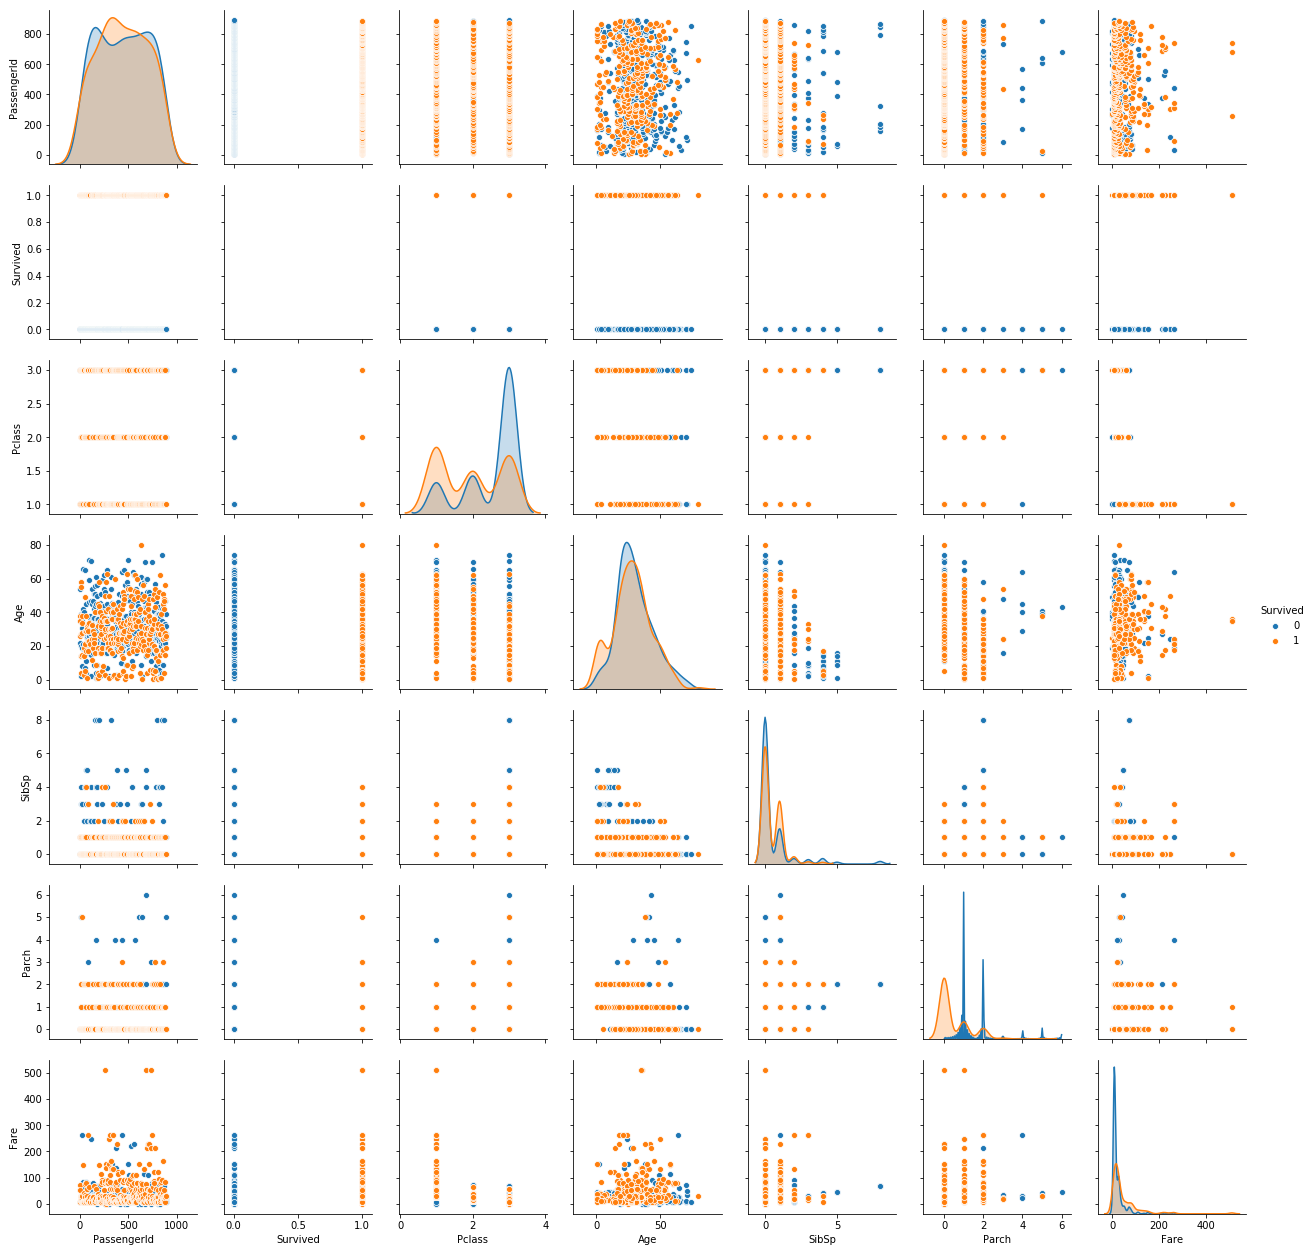

In [9]:
sns.pairplot(df, hue='Survived');

In [11]:
cols = ['Age', 'Fare', 'SibSp', 'Parch']

In [16]:
d = df[cols].dropna()

In [17]:
d.shape, df.shape

((714, 4), (891, 12))

In [14]:
df[cols].tail()

,Age,Fare,SibSp,Parch
886,27.0,13.00,0,0
887,19.0,30.00,0,0
888,NaN,23.45,1,2
889,26.0,30.00,0,0
890,32.0,7.75,0,0


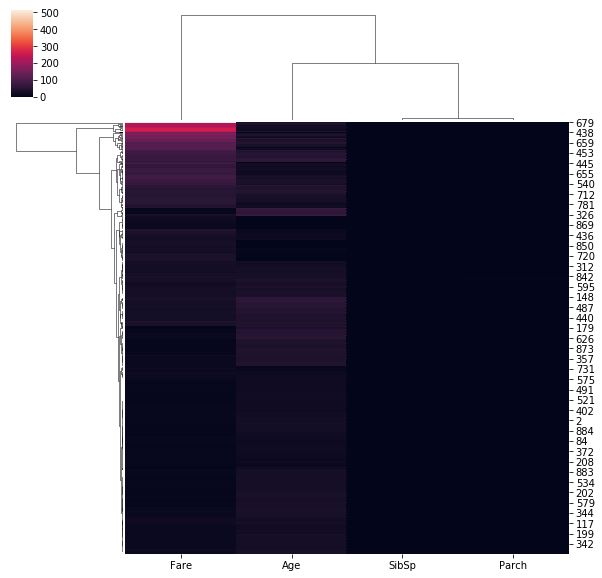

In [18]:
sns.clustermap(data=d[cols])

In [20]:
sns.set()

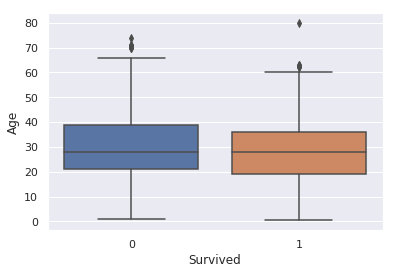

In [22]:
sns.boxplot(y='Age', x='Survived', data=df);

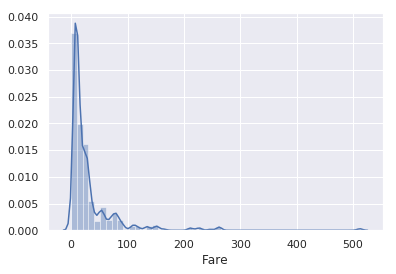

In [24]:
sns.distplot(df.Fare)

In [27]:
import numpy as np

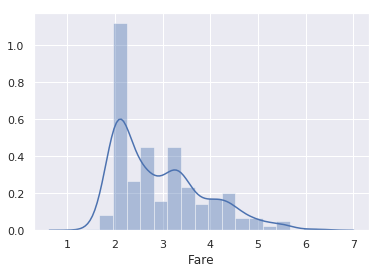

In [64]:
sns.distplot(np.log(df[df.Fare > 0].Fare));

In [34]:
a = df.Fare < 2

In [35]:
a.value_counts()

False    876
True      15
Name: Fare, dtype: int64

In [33]:
(df.Fare < 2).value_counts()

False    876
True      15
Name: Fare, dtype: int64

In [37]:
for x in df:
    print(x)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [36]:
for i, x in df.iterrows():
    if x['Fare'] < 2:
        print(x)

PassengerId                    180
Survived                         0
Pclass                           3
Name           Leonard, Mr. Lionel
Sex                           male
Age                             36
SibSp                            0
Parch                            0
Ticket                        LINE
Fare                             0
Cabin                          NaN
Embarked                         S
Name: 179, dtype: object
PassengerId                      264
Survived                           0
Pclass                             1
Name           Harrison, Mr. William
Sex                             male
Age                               40
SibSp                              0
Parch                              0
Ticket                        112059
Fare                               0
Cabin                            B94
Embarked                           S
Name: 263, dtype: object
PassengerId                             272
Survived                                  

In [41]:
5 * 4 + 1

21

In [42]:
df[(df.Fare < 2) & (df.Age > 30)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S


In [51]:
def foo(s):
    return 'Mr.' in s

In [49]:
s = 'Braund, Mr. Owen Harris'

In [56]:
df[df.Name.apply(foo)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


In [57]:
df[df.Name.apply(lambda x: 'Mr.' in x)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


In [66]:
pd.cut(df.Fare, 5).value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64